In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.lines import Line2D
from matplotlib.patches import ConnectionPatch

from scipy.interpolate import UnivariateSpline
from pathlib import Path
from cmcrameri import cm
from urllib.request import urlretrieve
from operator import sub

import qnmfits.qnm as qnm

plt.rcParams.update({
    'font.family': 'serif',
    'font.sans-serif': ['Computer Modern Roman'],
    'text.usetex': True
})

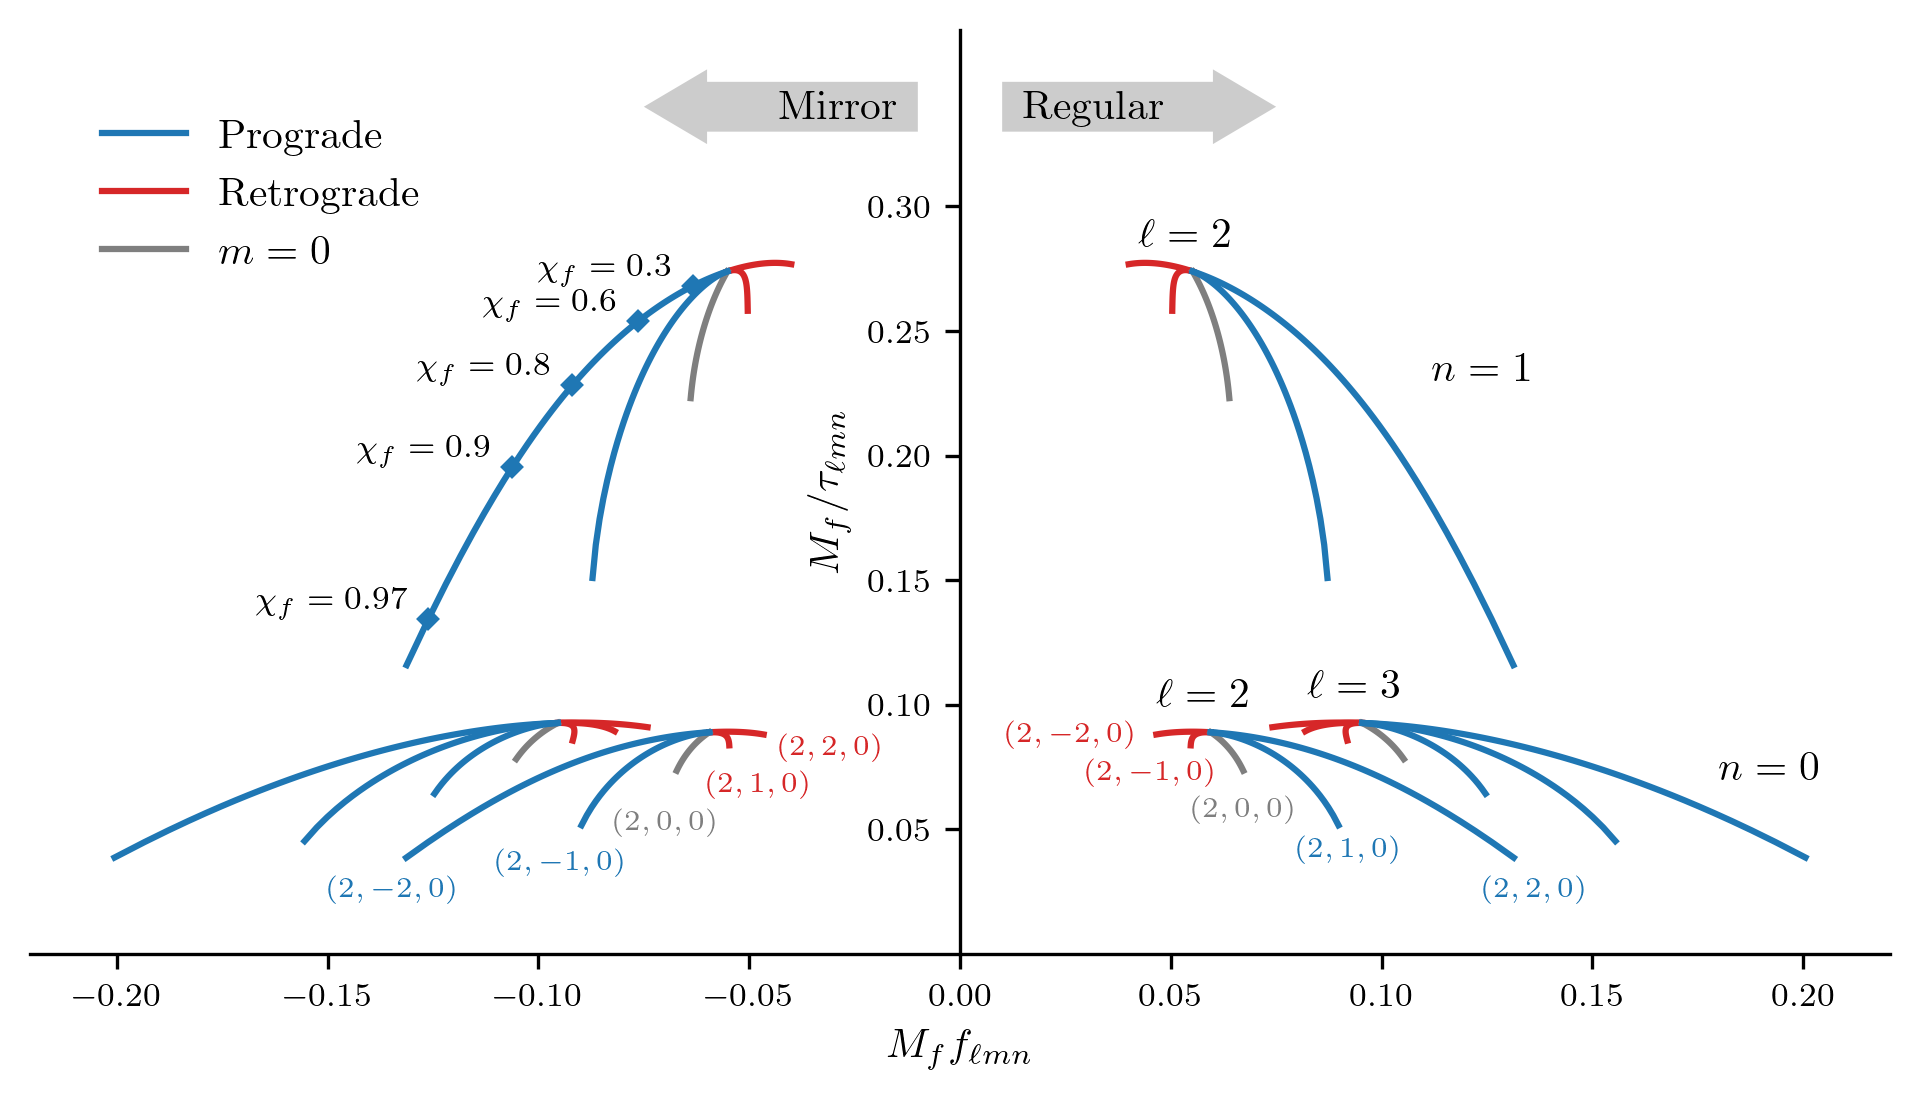

In [2]:
# The range of the dimensionless spin we plot the frequencies for
chi_array = np.arange(0, 0.99, 0.01)

fig, ax = plt.subplots(figsize=(8,4), dpi=300)

ax.spines['left'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for n in range(2):
    for l in range(2,4):
        
        if (l==3) & (n==1):
            pass
        
        else:
            for m in range(-l,l+1):
                
                # Colors
                if m < 0:
                    c = 'C3'
                if m == 0:
                    c = 'C7'
                if m > 0:
                    c = 'C0'
                
                # Evaluate the QNM frequencies
                frequencies = qnm.omega(l, m, n, 1, chi_array)
                
                if m==l:
                    # Label the ell group
                    ax.text(
                        np.real(frequencies[0])/(2*np.pi)-0.013, 
                        -np.imag(frequencies[0])+0.01, f'$\ell = {l}$',
                        fontsize=10
                    )
                    
                if (l==2) and (m==2) and (n==1):
                    
                    # Label particular values of spin (we will plot on the 
                    # mirror half for clarity)
                    select_chi_list = [0.3, 0.6, 0.8, 0.9, 0.97]
                    select_freq_list = qnm.omega(l, m, n, 1, select_chi_list)
                    
                    ax.plot(
                        -np.real(select_freq_list)/(2*np.pi), 
                        -np.imag(select_freq_list), 
                        'D', c='C0', markersize=3
                    )
                    
                    for i, chi in enumerate(select_chi_list):
                        freq = select_freq_list[i]
                        ax.text(
                            -np.real(freq)/(2*np.pi)-0.005, 
                            -np.imag(freq)+0.004, 
                            f'$\chi_f = {chi}$', 
                            fontsize=8,
                            horizontalalignment='right'
                        )
                        
                # Add to the figure
                ax.plot(
                    np.real(frequencies)/(2*np.pi), 
                    -np.imag(frequencies), 
                    c=c
                )
                ax.plot(
                    -np.real(frequencies)/(2*np.pi), 
                    -np.imag(frequencies), 
                    c=c
                )

# Overtone labels
# ---------------

ax.text(0.18, 0.07, '$n=0$', fontsize=10)
ax.text(0.112, 0.23, '$n=1$', fontsize=10)

# (ell,m,n) labels
# ------------------

ax.text(0.011, 0.085, '$(2,-2,0)$', fontsize=7, c='C3')
ax.text(0.03, 0.07, '$(2,-1,0)$', fontsize=7, c='C3')
ax.text(0.055, 0.055, '$(2,0,0)$', fontsize=7, c='C7')
ax.text(0.08, 0.039, '$(2,1,0)$', fontsize=7, c='C0')
ax.text(0.124, 0.023, '$(2,2,0)$', fontsize=7, c='C0')

x_adjust = -0.03
ax.text(-0.013+x_adjust, 0.08, "$(2,2,0)$", fontsize=7, c='C3')
ax.text(-0.03+x_adjust, 0.065, "$(2,1,0)$", fontsize=7, c='C3')
ax.text(-0.052+x_adjust, 0.05, "$(2,0,0)$", fontsize=7, c='C7')
ax.text(-0.08+x_adjust, 0.034, "$(2,-1,0)$", fontsize=7, c='C0')
ax.text(-0.12+x_adjust, 0.023, "$(2,-2,0)$", fontsize=7, c='C0')

# Axis labels and ticks
# ---------------------

ax.set_xlabel('$M_ff_{\ell m n}$')
ax.set_ylabel('$M_f/ \\tau_{\ell m n}$')

# ax.set_xticks([0])
ax.set_yticks([0.05, 0.1, 0.15, 0.2, 0.25, 0.3])
ax.tick_params(axis='both', which='major', labelsize=8)
ax.tick_params(axis='both', which='minor', labelsize=8)

# Arrows
# ------

width=0.02
y_adjust = -0.01

ax.arrow(
    0.01,0.35+y_adjust,
    0.05,0,
    width=width,
    head_width=width*1.5,
    head_length=width*0.75,
    fc=(0,0,0,0.2),
    ec=(0,0,0,0.))

ax.arrow(
    -0.01,0.35+y_adjust,
    -0.05,0,
    width=width,
    head_width=width*1.5,
    head_length=width*0.75,
    fc=(0,0,0,0.2),
    ec=(0,0,0,0.))

ax.text(0.005+0.01, 0.345+y_adjust, 'Regular', fontsize=10)
ax.text(-0.033-0.01, 0.345+y_adjust, 'Mirror', fontsize=10)

# y-axis limit adjustment
# -----------------------

ax.set_ylim(0.0, ax.get_ylim()[-1])

# Legend
# ------

custom_lines = [
    Line2D([0], [0], c='C0'),
    Line2D([0], [0], c='C3'),
    Line2D([0], [0], c='C7')
]

ax.legend(
    custom_lines, 
    ['Prograde', 'Retrograde', '$m=0$'], 
    frameon=False, 
    loc=(0.03,0.72)
)

fig.savefig('qnm_taxonomy.png', bbox_inches='tight')

In [3]:
def get_aspect(ax):
    # Function used when converting line derivative to rotation angle for the 
    # text labels
    # https://stackoverflow.com/questions/41597177/get-aspect-ratio-of-axes
    
    # Total figure size
    figW, figH = ax.get_figure().get_size_inches()
    
    # Axis size on figure
    _, _, w, h = ax.get_position().bounds
    
    # Ratio of display units
    disp_ratio = (figH * h) / (figW * w)
    
    # Ratio of data units
    # Negative over negative because of the order of subtraction
    data_ratio = sub(*ax.get_ylim()) / sub(*ax.get_xlim())

    return disp_ratio / data_ratio

In [4]:
data_dir = Path('../qnmfits/Data')
data_dir.mkdir(parents=True, exist_ok=True)

download_url = 'https://pages.jh.edu/eberti2/ringdown/s2l2.dat'
file_path = data_dir / 's2l2.dat'

if not file_path.exists():
    print('Downloading s2l2.dat...')
    urlretrieve(download_url, file_path)
else:
    print('s2l2.dat already downloaded.')

schwarzschild_data = np.loadtxt(file_path)

s2l2.dat already downloaded.


In [5]:
schwarzschild_spectrum = {}
for row in schwarzschild_data:
    omega = (row[0] - 1j*row[1])/2
    n = int(row[3])
    schwarzschild_spectrum[2,n] = omega

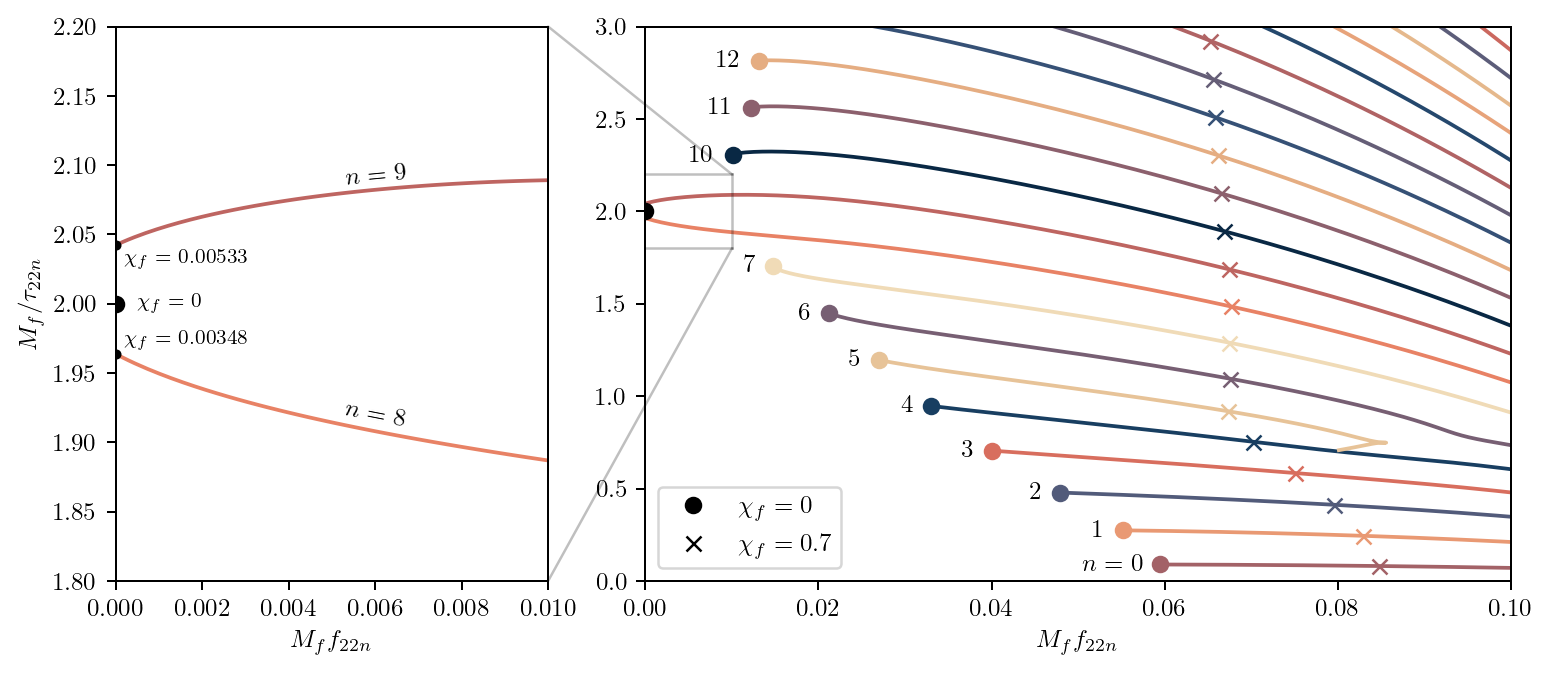

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(10,4), width_ratios=[1,2], dpi=180)
fig.subplots_adjust(wspace=0.15)

cmap = cm.lipariS

chi_array_temp = np.linspace(0.1, 0.99, 1000)
indicated_chi = 0.7

for n in range(22):

    lc = cmap(n+2) # cmap(n/21)

    if n == 8:
        c = 'black'
    elif n > 8:
        c = cmap(n+2+1)
    else:
        c = lc

    axs[1].plot(
        np.real(schwarzschild_spectrum[2,n])/(2*np.pi), 
        -np.imag(schwarzschild_spectrum[2,n]), 
        'o', 
        c=c,
        zorder=10
    )

    if n < 12:

        if n == 0:
            text = '$n=0$'
        elif n == 8:
            text = ''
        elif n > 8:
            text = f'${n+1}$'
        else:
            text = f'${n}$'

        axs[1].text(
            np.real(schwarzschild_spectrum[2,n])/(2*np.pi)-0.002, 
            -np.imag(schwarzschild_spectrum[2,n]), 
            text,
            fontsize=10,
            ha='right',
            va='center',
        )

    omega = qnm.omega(2,2,n,1,chi_array_temp)
    chi_array = qnm._interpolated_qnm_funcs[2,2,n][0][0].get_knots()
    omega = qnm.omega(2,2,n,1,chi_array)

    axs[1].plot(
        np.real(omega)/(2*np.pi), 
        -np.imag(omega), 
        c=lc,
    )

    chi_index = np.argmin(np.abs(chi_array-indicated_chi))
    axs[1].plot(
        np.real(omega[chi_index])/(2*np.pi), 
        -np.imag(omega[chi_index]), 
        'x', 
        c=lc,
        zorder=10
    )

inset_xlim = (0, 0.01)
inset_ylim = (1.8, 2.2)

axs[0].set_xlim(inset_xlim)
axs[0].set_ylim(inset_ylim)

aspect = get_aspect(axs[0])

axs[0].plot(
    np.real(schwarzschild_spectrum[2,8])/(2*np.pi), 
    -np.imag(schwarzschild_spectrum[2,8]), 
    'o', 
    c='black',
    zorder=10
)

for n in [8,9]:

    lc = cmap(n+2)

    omega = qnm.omega(2,2,n,1,chi_array_temp)
    chi_array = qnm._interpolated_qnm_funcs[2,2,n][0][0].get_knots()
    omega = qnm.omega(2,2,n,1,chi_array)

    axs[0].plot(
        np.real(omega)/(2*np.pi), 
        -np.imag(omega), 
        c=lc,
    )

    axs[0].plot(
        (np.real(omega)/(2*np.pi))[0], 
        -np.imag(omega)[0], 
        'o',
        markersize=3,
        c='black',
        zorder=10
    )

    axs[0].text(
        0.0002,
        -np.imag(omega[0])+[0.01, -0.01][n-8],
        f'$\chi_f = {chi_array[0]:.5f}$',
        fontsize=8,
        ha='left',
        va='center',
    )

    omega_spline = UnivariateSpline(np.real(omega)/(2*np.pi), -np.imag(omega), s=0)
    omega_deriv = omega_spline.derivative()

    text_x = 0.006
    rot = np.rad2deg(np.arctan(omega_deriv(text_x)*aspect))

    axs[0].text(
        text_x,
        omega_spline(text_x),
        f'$n={n}$',
        rotation=rot,
        ha='center',
        va='bottom',
    )

axs[0].text(
    np.real(schwarzschild_spectrum[2,8])/(2*np.pi)+0.0005, 
    -np.imag(schwarzschild_spectrum[2,8]), 
    '$\chi_f = 0$',
    fontsize=8,
    ha='left',
    va='center',
)

fig.add_artist(
    ConnectionPatch(
        xyA=(inset_xlim[1],inset_ylim[1]), 
        coordsA=axs[0].transData, 
        xyB=(inset_xlim[1],inset_ylim[1]), 
        coordsB=axs[1].transData,
        color='k',
        alpha=0.25,
        zorder=10.
        )
    )

fig.add_artist(
    ConnectionPatch(
        xyA=(inset_xlim[1],inset_ylim[0]), 
        coordsA=axs[0].transData, 
        xyB=(inset_xlim[1],inset_ylim[0]), 
        coordsB=axs[1].transData,
        color='k',
        alpha=0.25,
        zorder=10.
        )
    )

box_lw = 1
axs[1].plot(inset_xlim, [inset_ylim[0], inset_ylim[0]], c='k', alpha=0.25, lw=box_lw)
axs[1].plot(inset_xlim, [inset_ylim[1], inset_ylim[1]], c='k', alpha=0.25, lw=box_lw)
axs[1].plot([inset_xlim[1], inset_xlim[1]], inset_ylim, c='k', alpha=0.25, lw=box_lw)

custom_lines = [
    Line2D([0], [0], c='k', marker='o', lw=0),
    Line2D([0], [0], c='k', marker='x', lw=0),
]

axs[1].legend(
    custom_lines, 
    ['$\chi_f = 0$', f'$\chi_f = {indicated_chi}$'], 
    loc='lower left'
)

axs[1].set_xlim(0, 0.1)
axs[1].set_ylim(0., 3.)

axs[1].set_xlabel('$M_f f_{22n}$')
axs[0].set_xlabel('$M_f f_{22n}$')
axs[0].set_ylabel('$M_f/ \\tau_{22n}$')

fig.savefig('qnm_multiplet_taxonomy.png', bbox_inches='tight')

How many overtones can we go up to?

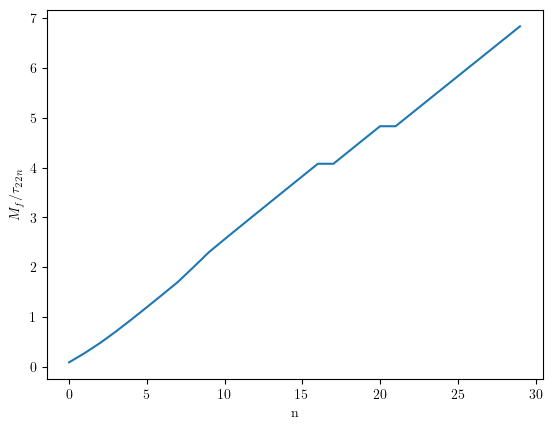

In [7]:
# There appear to be some incorrect Schwarzschild frequencies in the data:

# Extract separate lists for the overtone number (n) and imaginary part of the 
# frequency
n_list = []
im_list = []

for (ell,n), omega in schwarzschild_spectrum.items():
    n_list.append(n)
    im_list.append(-np.imag(omega))

# Sort n_list according to im_list
n_list_sorted = [n for _,n in sorted(zip(im_list,n_list))]
im_list_sorted = sorted(im_list)

fig, ax = plt.subplots()

ax.plot(im_list_sorted[:30])

ax.set_xlabel('n')
_ = ax.set_ylabel('$M_f/ \\tau_{22n}$')

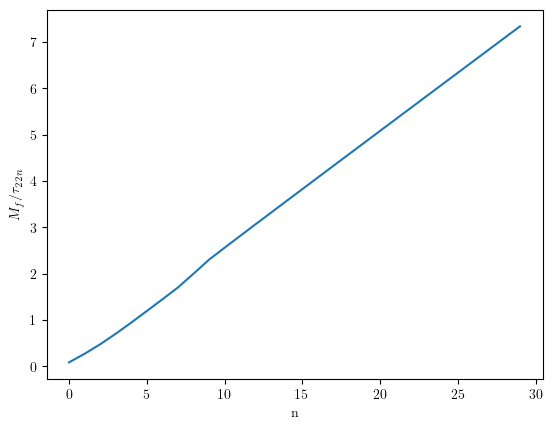

In [8]:
# A couple of duplicates?

# Cut the frequencies that appear to be duplicates
n_list_sorted_cut = []
im_list_sorted_cut = []

previous_im = -1
for n, im in zip(n_list_sorted, im_list_sorted):
    if abs(im-previous_im) > 0.01:
        n_list_sorted_cut.append(n)
        im_list_sorted_cut.append(im)
        previous_im = im

fig, ax = plt.subplots()

ax.plot(im_list_sorted_cut[:30])

ax.set_xlabel('n')
_ = ax.set_ylabel('$M_f/ \\tau_{22n}$')

In [9]:
# Our modified data
schwarzschild_spectrum_edit = {}

for i, n in enumerate(n_list_sorted_cut):
    omega = schwarzschild_spectrum[2,n]
    schwarzschild_spectrum_edit[i] = omega

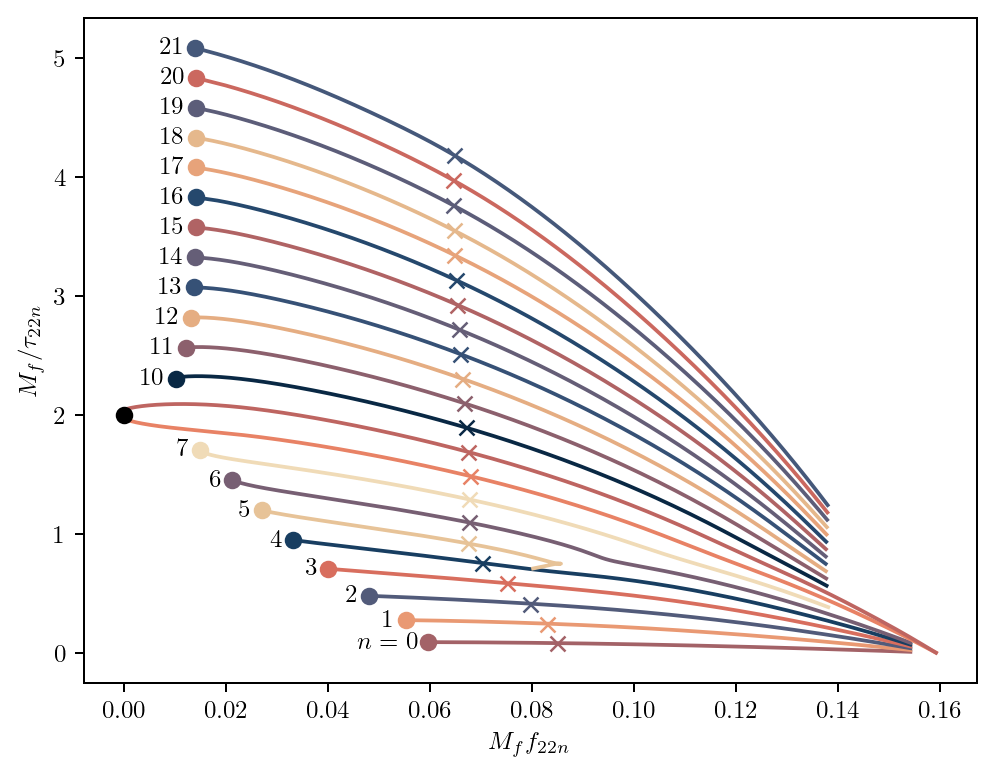

In [10]:
fig, ax = plt.subplots(dpi=180)

cmap = cm.lipariS

chi_array_temp = np.linspace(0.1, 0.99, 1000)
indicated_chi = 0.7

for n in range(22):

    lc = cmap(n+2) # cmap(n/21)

    if n == 8:
        c = 'black'
    elif n > 8:
        c = cmap(n+2+1)
    else:
        c = lc

    if n != 21:
        ax.plot(
            np.real(schwarzschild_spectrum_edit[n])/(2*np.pi), 
            -np.imag(schwarzschild_spectrum_edit[n]), 
            'o', 
            c=c,
            zorder=10
        )

        if n == 0:
            text = '$n=0$'
        elif n == 8:
            text = ''
        elif n > 8:
            text = f'${n+1}$'
        else:
            text = f'${n}$'

        ax.text(
            np.real(schwarzschild_spectrum_edit[n])/(2*np.pi)-0.002, 
            -np.imag(schwarzschild_spectrum_edit[n]), 
            text,
            fontsize=10,
            ha='right',
            va='center',
        )

    omega = qnm.omega(2,2,n,1,chi_array_temp)
    chi_array = qnm._interpolated_qnm_funcs[2,2,n][0][0].get_knots()
    omega = qnm.omega(2,2,n,1,chi_array)

    ax.plot(
        np.real(omega)/(2*np.pi), 
        -np.imag(omega), 
        c=lc,
    )

    chi_index = np.argmin(np.abs(chi_array-indicated_chi))
    ax.plot(
        np.real(omega[chi_index])/(2*np.pi), 
        -np.imag(omega[chi_index]), 
        'x', 
        c=lc,
        zorder=10
    )

ax.set_xlabel('$M_f f_{22n}$')
_ = ax.set_ylabel('$M_f/ \\tau_{22n}$')

This looks like the best we can do with the `qnm` package; if we go beyond $n=21$ (in our labeling system) we get errors.